In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d # interp1d pour traiter interpolation
from scipy.optimize import curve_fit # curve_fit pour optimiser par exemple un nuage du point a un simle courbe
from scipy.optimize import minimize # minimize pour chercher   minimum la plus proche a un point x0
from scipy import signal # pour traiter les signals 
from scipy import fftpack # pour des transformation de fourier e filter un signal
from scipy import ndimage # pour traiter les images 

# INTERPOLTION

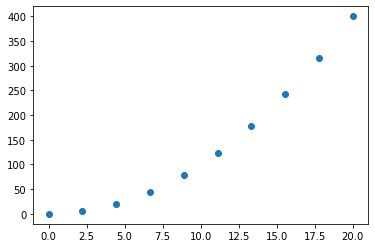

In [2]:
x=np.linspace(0,20,10)
y=x**2
plt.scatter(x,y)

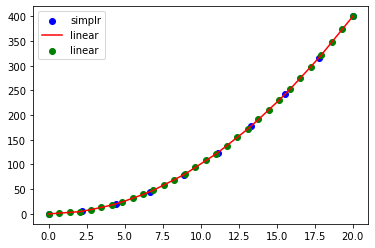

In [3]:
f = interp1d(x,y,kind='linear') # fair une interpolation de type linear
x_news=np.linspace(0,20,30)
y_news=f(x_news)
plt.scatter(x,y,label='simplr',c='b')
plt.plot(x_news,y_news,color='r',label='linear')
plt.scatter(x_news,y_news,color='g',label='linear')
plt.legend()

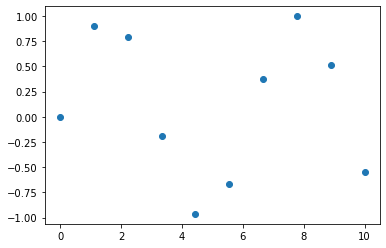

In [4]:
x=np.linspace(0,10,10)
y=np.sin(x)
plt.scatter(x,y)

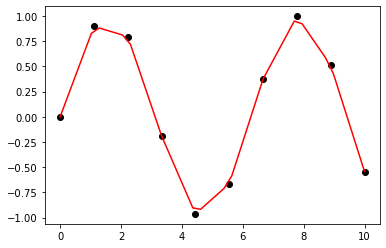

In [5]:
f = interp1d(x,y,kind='linear')#parfois il est mieux d'utiliser d'autre type d'interpolation comme cubic,quadratic
x_news=np.linspace(0,10,40)
y_news=f(x_news)
plt.scatter(x,y ,c='black')
plt.plot(x_news,y_news,color='r' )

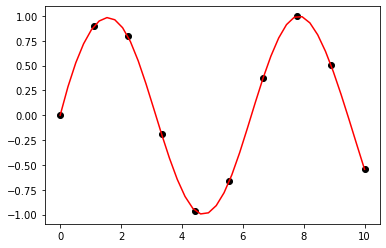

In [6]:
f = interp1d(x,y,kind='cubic')
x_news=np.linspace(0,10,40)
y_news=f(x_news)
plt.scatter(x,y ,c='black')
plt.plot(x_news,y_news,color='r' )

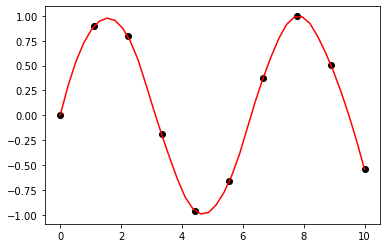

In [7]:
f = interp1d(x,y,kind='quadratic')
x_news=np.linspace(0,10,40)
y_news=f(x_news)
plt.scatter(x,y ,c='black')
plt.plot(x_news,y_news,color='r' )

# Curve_fit

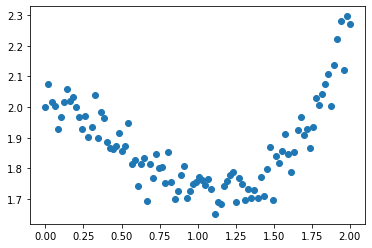

In [8]:
x=np.linspace(0,2,100)
y=1/3*x**3-3/5*x**2+2 +np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [9]:
def f(x,a,b,c,d):
     return a*x**3+b*x**2+c*x+d

In [10]:
parms,parms_corr=curve_fit(f,x,y)# faire une minimisation et donne des parametres nouvelle de a.b.c.d pour tracer un courbe representant le nuage de point

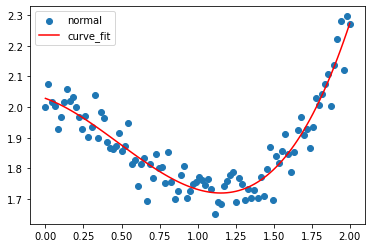

In [11]:
plt.scatter(x,y,label='normal')
plt.plot(x,f(x,parms[0],parms[1],parms[2],parms[3]),color='r',label='curve_fit')#donner a f les parametre  de curve_fit
plt.legend()

# Minimize

In [12]:
def f(x):
    return x**2 + 15*np.sin(x)

      fun: 4.5296310810680325
 hess_inv: array([[0.06884717]])
      jac: array([-1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.12933283])

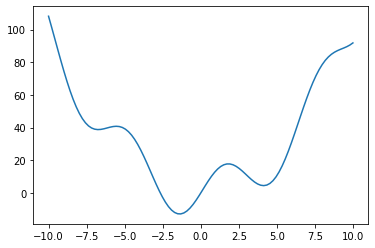

In [13]:
x=np.linspace(-10,10,100)
plt.plot(x,f(x))
minimize(f,x0=5)

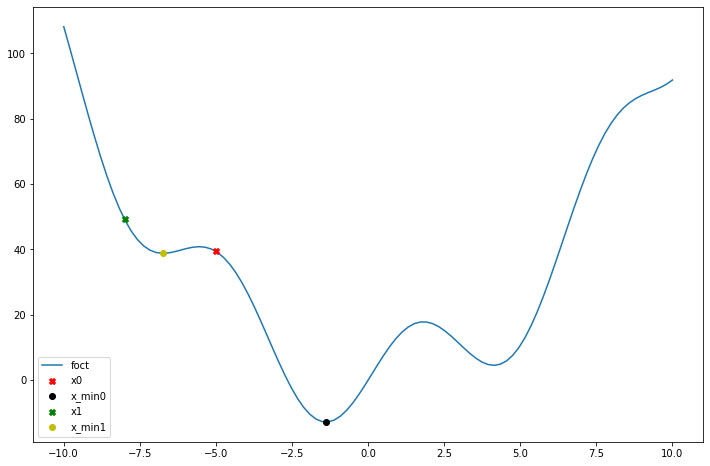

In [14]:
plt.figure(figsize=(12,8))
x0=-5 
x1=-8
x_min0=minimize(f,x0).x #donner la min local du courbe qui est proche de x0
plt.plot(x,f(x),label='foct',zorder=-2)
plt.scatter(x0,f(x0),c='r',label='x0',zorder=2,marker='X')
plt.scatter(x_min0,f(x_min0),c='black',label='x_min0',zorder=2)
x_min1=minimize(f,x1).x 
plt.scatter(x1,f(x1),c='g',label='x1',zorder=2,marker='X')
plt.scatter(x_min1,f(x_min1),c='y',label='x_min1',zorder=2)
plt.legend()

# Traitement de signal

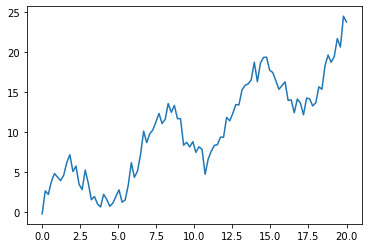

In [15]:
x = np.linspace(0,20,100)
y = x+4*np.sin(x)+np.random.randn(x.shape[0])
plt.plot(x,y)

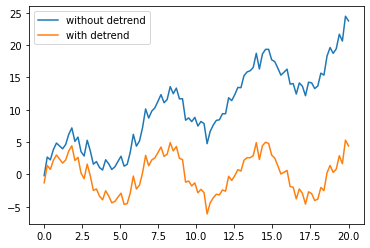

In [16]:
y_news=signal.detrend(y)#eleminer tandance linear
plt.plot(x,y,label='without detrend')
plt.plot(x,y_news,label='with detrend')
plt.legend()

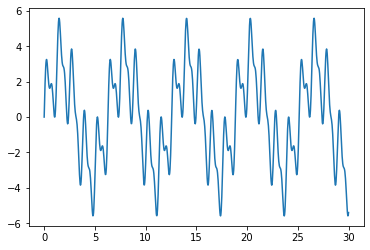

In [17]:
x=np.linspace(0,30,1000)
y= 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) 
plt.plot(x,y)

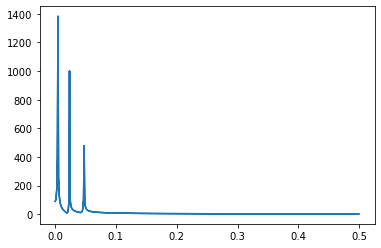

In [18]:
fourier=fftpack.fft(y)# donne des freq neggative ans amplutid neggative
power=np.abs(fourier)
freq=fftpack.fftfreq(y.size)#donner des freq negative 
abs_freq=np.abs(freq)
plt.plot(abs_freq,power)

# Filter un signal

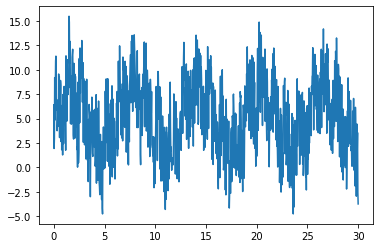

In [19]:
x=np.linspace(0,30,1000)
y= 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

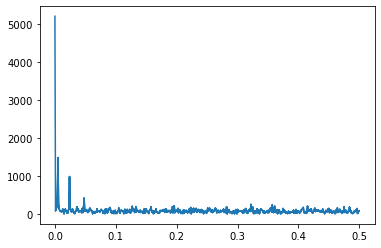

In [20]:
fourier=fftpack.fft(y)
power=np.abs(fourier)
freq=fftpack.fftfreq(y.size)
abs_freq=np.abs(freq)
plt.plot(abs_freq,power)

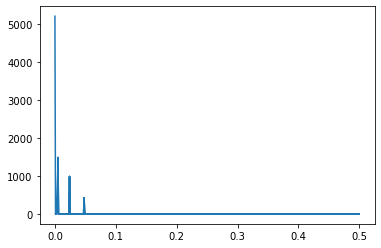

In [21]:
fourier[power<300]=0#donner un seuil pour eleminer les for qui sont inf a 300 
plt.plot(abs_freq,np.abs(fourier))

C:\Users\hamza nachid\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


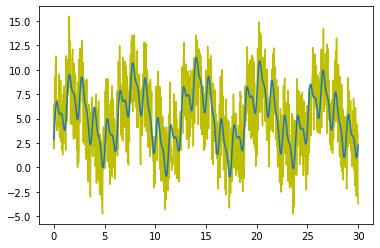

In [22]:
filter_signal=fftpack.ifft(fourier)# transformer un signal filter un signal normal
plt.plot(x,y,color='y') 
plt.plot(x,filter_signal)

# Traitement d'image

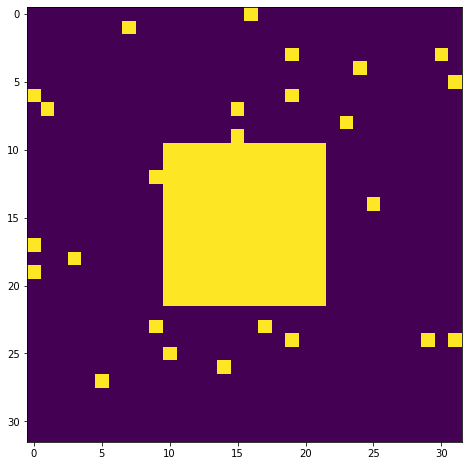

In [23]:
plt.figure(figsize=(12,8))
np.random.seed(0)
x=np.zeros((32,32))#remplaire le tableau par des 0
x[10:-10,10:-10]=1 #donner a lis element au centre la valeur 1
x[np.random.randint(0,32,30),np.random.randint(0,32,30)]=1 #donner a des case aleratoire l valeur 1
plt.imshow(x)#afficher untableau comme un image 

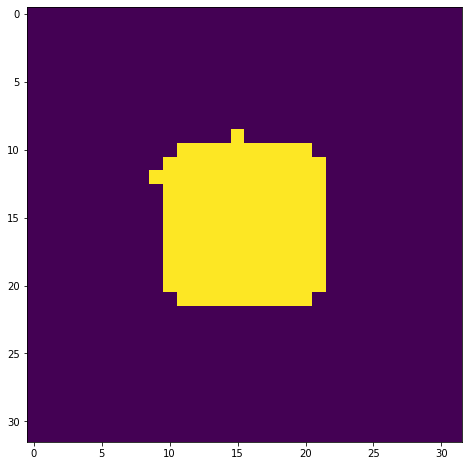

In [24]:
plt.figure(figsize=(12,8))
x=ndimage.binary_opening(x)#combinaison entre dilation et erosion  
plt.imshow(x)

# Appliction

(507, 537)

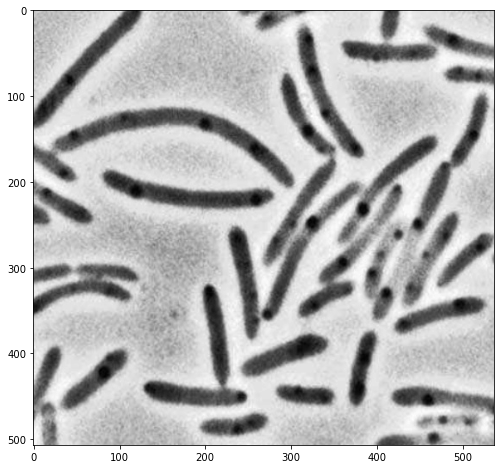

In [32]:
plt.figure(figsize=(12,8))
image=plt.imread('bacteria.png')
image=image[:,:,0]
plt.imshow(image,cmap='gray')
image.shape

(array([3.000e+00, 7.000e+00, 1.500e+01, 3.500e+01, 0.000e+00, 6.500e+01,
        1.030e+02, 1.030e+02, 1.120e+02, 0.000e+00, 1.610e+02, 1.460e+02,
        1.370e+02, 1.450e+02, 0.000e+00, 1.410e+02, 1.660e+02, 1.350e+02,
        0.000e+00, 1.340e+02, 1.590e+02, 1.330e+02, 1.580e+02, 0.000e+00,
        1.590e+02, 1.420e+02, 1.680e+02, 2.000e+02, 0.000e+00, 2.330e+02,
        2.370e+02, 2.350e+02, 2.990e+02, 0.000e+00, 3.240e+02, 3.640e+02,
        3.600e+02, 0.000e+00, 4.430e+02, 4.460e+02, 4.580e+02, 4.540e+02,
        0.000e+00, 4.880e+02, 5.620e+02, 5.530e+02, 5.190e+02, 0.000e+00,
        5.930e+02, 6.360e+02, 6.310e+02, 0.000e+00, 7.320e+02, 7.310e+02,
        8.210e+02, 8.400e+02, 0.000e+00, 9.270e+02, 9.620e+02, 1.010e+03,
        1.092e+03, 0.000e+00, 1.105e+03, 1.120e+03, 1.091e+03, 1.153e+03,
        0.000e+00, 1.252e+03, 1.362e+03, 1.349e+03, 0.000e+00, 1.354e+03,
        1.335e+03, 1.316e+03, 1.308e+03, 0.000e+00, 1.163e+03, 1.153e+03,
        1.076e+03, 1.044e+03, 0.000e+0

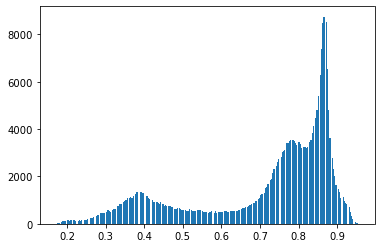

In [33]:
image1=image.copy()
plt.hist(image1.ravel(),bins=255)

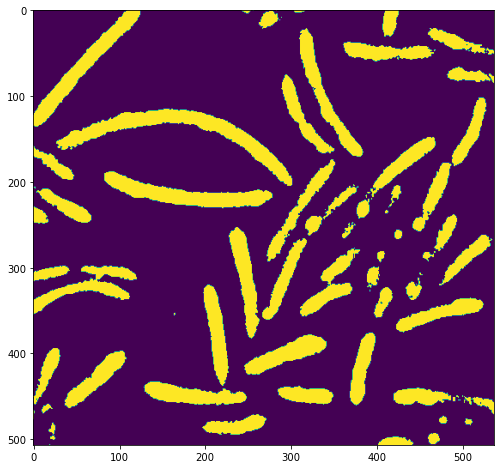

In [27]:
plt.figure(figsize=(12,8))
image=image<0.5 
plt.imshow(image)

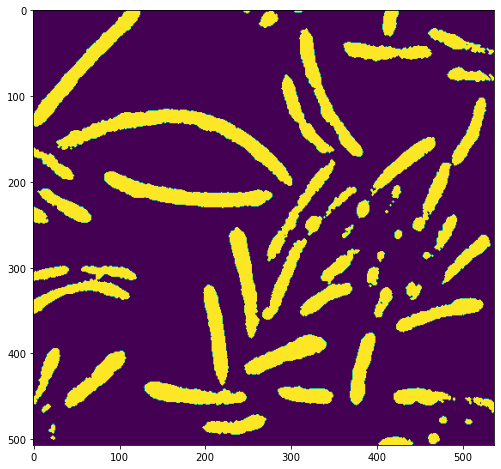

In [34]:
plt.figure(figsize=(12,8))
image=image<0.5
image=ndimage.binary_opening(image)
plt.imshow(image)

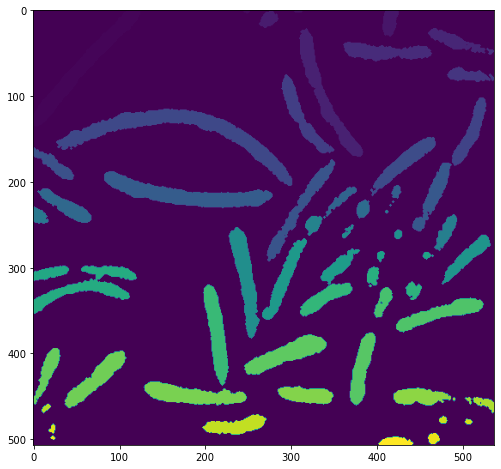

In [35]:
labels_image,labels_size=ndimage.label(image)
plt.figure(figsize=(12,8))
plt.imshow(labels_image)

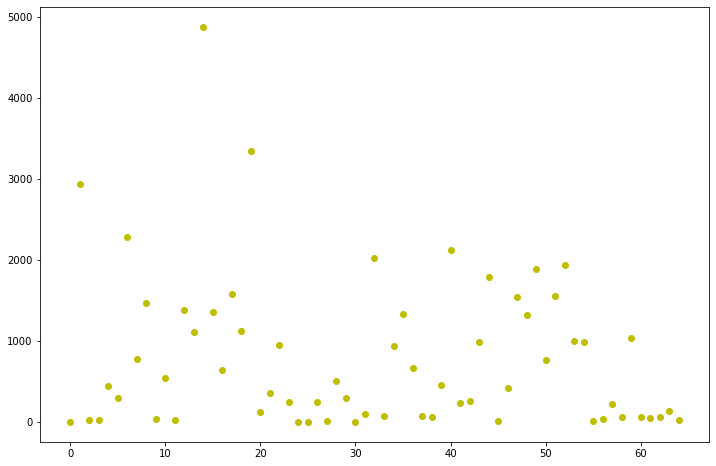

In [36]:
plt.figure(figsize=(12,8))
sizes=ndimage.sum(image,labels_image,range(labels_size))
plt.scatter(range(labels_size),sizes,c='y')